# **Content Based Filtering / Movie Recommender System**


---


Developed by:
1. Daud Fernando [1904470]
2. Fauzan Sukmapratama [1903091]


---


Bisnis Digital | Ujian Akhir Semester | Business Intelligence


---



# Content-based Filtering

# Import Library

In [ ]:
#for data analysis and manipulation tool
import pandas as pd

#for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#for removing warning when creating figure using pyplot library
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('dataanime.csv')
df.head()

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,2009-4-5,2010-7-4,Spring,Sundays at 17:00 (JST),"Aniplex,Square Enix,Mainichi Broadcasting Syst...","Funimation,Aniplex of America",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387,"""In order for something to be obtained, someth..."
1,Kimi no Na wa.,Movie,1,Finished Airing,2016-8-26,-,-,-,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...","Funimation,NYAV Post",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936,"Mitsuha Miyamizu, a high school girl, yearns t..."
2,Gintama°,TV,51,Finished Airing,2015-4-8,2016-3-30,Spring,Wednesdays at 18:00 (JST),"TV Tokyo,Aniplex,Dentsu","Funimation,Crunchyroll",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597,"Gintoki, Shinpachi, and Kagura return as the f..."
3,Steins;Gate 0,TV,23,Currently Airing,2018-4-12,-,Spring,Thursdays at 01:35 (JST),Nitroplus,Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,12609,186331,1117,The dark untold story of Steins;Gate that lead...
4,Steins;Gate,TV,24,Finished Airing,2011-4-6,2011-9-14,Spring,Wednesdays at 02:05 (JST),"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365,The self-proclaimed mad scientist Rintarou Oka...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1563 non-null   object 
 1   Type             1563 non-null   object 
 2   Episodes         1563 non-null   object 
 3   Status           1563 non-null   object 
 4   Start airing     1563 non-null   object 
 5   End airing       1563 non-null   object 
 6   Starting season  1563 non-null   object 
 7   Broadcast time   1563 non-null   object 
 8   Producers        1563 non-null   object 
 9   Licensors        1563 non-null   object 
 10  Studios          1563 non-null   object 
 11  Sources          1563 non-null   object 
 12  Genres           1563 non-null   object 
 13  Duration         1563 non-null   object 
 14  Rating           1563 non-null   object 
 15  Score            1563 non-null   float64
 16  Scored by        1563 non-null   int64  
 17  Members       

In [ ]:
cat_df_anime = df.select_dtypes(include=['object']).copy()
num_df_anime = df.select_dtypes(include=['int', 'float']).copy()

In [ ]:
cat_df_anime.describe()

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Description
count,1563,1563,1563,1563,1563,1563,1563,1563,1563,1563,1563,1563,1563,1563,1563,1563
unique,1563,6,107,2,1170,761,5,199,809,111,200,14,1004,171,5,1545
top,Fullmetal Alchemist: Brotherhood,TV,1,Finished Airing,-,-,-,-,-,-,Sunrise,Manga,"Slice of Life,Comedy",24 min. per ep.,PG-13,-
freq,1,821,525,1528,14,585,742,1009,376,607,106,767,16,426,1040,12


In [ ]:
num_df_anime.describe()

,Score,Scored by,Members,Favorites
count,1563.000000,1563.000000,1.563000e+03,1563.00000
mean,7.905144,60537.209213,1.153567e+05,2309.15483
std,0.340127,99856.869169,1.669685e+05,7358.06195
min,7.480000,144.000000,7.810000e+02,1.00000
25%,7.630000,6876.000000,1.738050e+04,54.00000
50%,7.820000,24730.000000,5.209700e+04,264.00000
75%,8.110000,68933.500000,1.367520e+05,1273.00000
max,9.250000,993775.000000,1.432871e+06,105387.00000


Data kategorikal perlu dicari sebaran nilai dalam data set ini. Namun, hanya beberapa yang diambil (yakni yang tidak unik di setiap barisnya), di antaranya :
1. Status
2. Starting Season
3. Sources
4. Rating

# Exploratory Data Analysis (EDA)

In [ ]:
cats = ['Status', 'Starting season', 'Sources', 'Rating']

Calculate the percentage of ' Status ' variable 



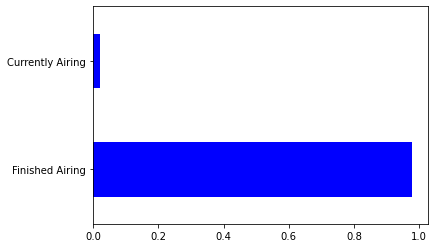


Calculate the percentage of ' Starting season ' variable 



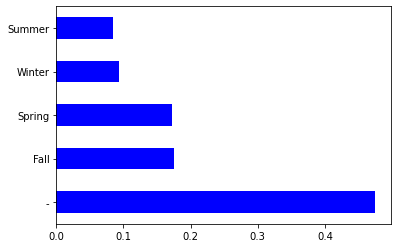


Calculate the percentage of ' Sources ' variable 



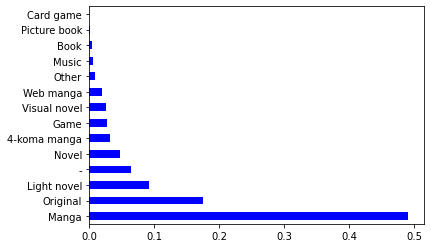


Calculate the percentage of ' Rating ' variable 



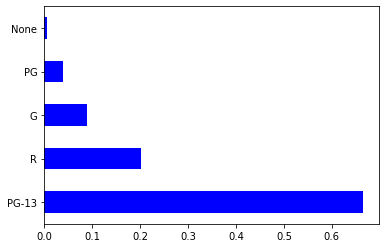

In [ ]:
for i in cats:

    df[i].value_counts(normalize=True)
    print("Calculate the percentage of '",i,"' variable \n")
    #plot the bar graph of percentage job categories
    df[i].value_counts(normalize=True).plot.barh(color="blue")
    plt.show()
    print("="*30,"\n")


<AxesSubplot:>

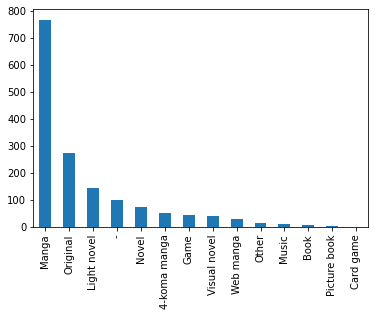

In [ ]:
cat_df_anime['Sources'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

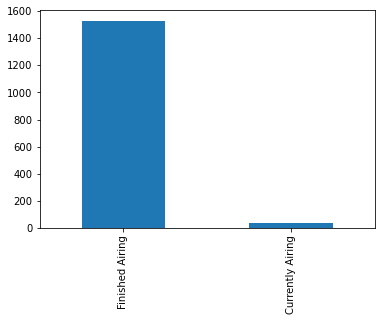

In [ ]:
cat_df_anime['Status'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

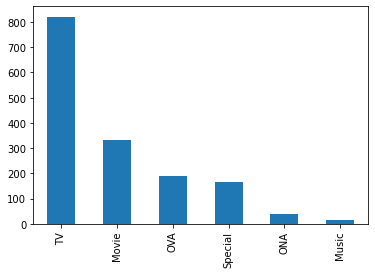

In [ ]:
cat_df_anime.Type.value_counts().plot(kind = 'bar')

<AxesSubplot:>

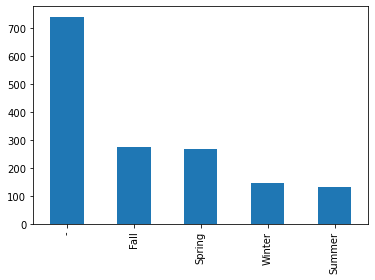

In [ ]:
cat_df_anime['Starting season'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

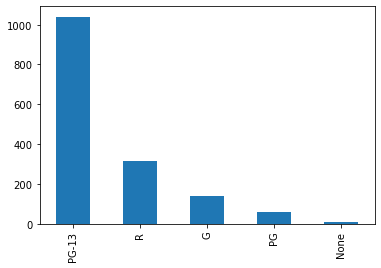

In [ ]:
cat_df_anime['Rating'].value_counts().plot(kind = 'bar')

In [ ]:
nums = ['Score', 'Scored by', 'Members', 'Favorites']

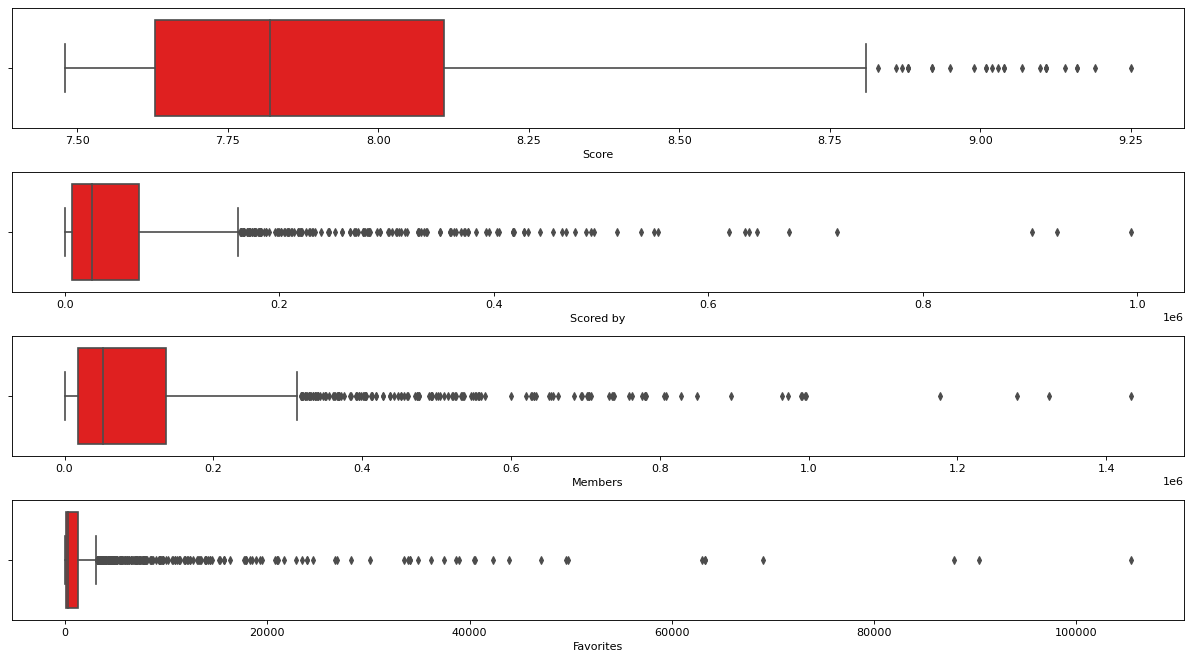

In [ ]:
figure(figsize=(15, 10), dpi=80)
for i in range(0, len(nums)):
    plt.subplot(5, len(nums)/4, i+1)
    sns.boxplot(df[nums[i]], color='red', orient= "v")
    plt.tight_layout()

Text(0.5, 1.0, 'Correlation between different features')

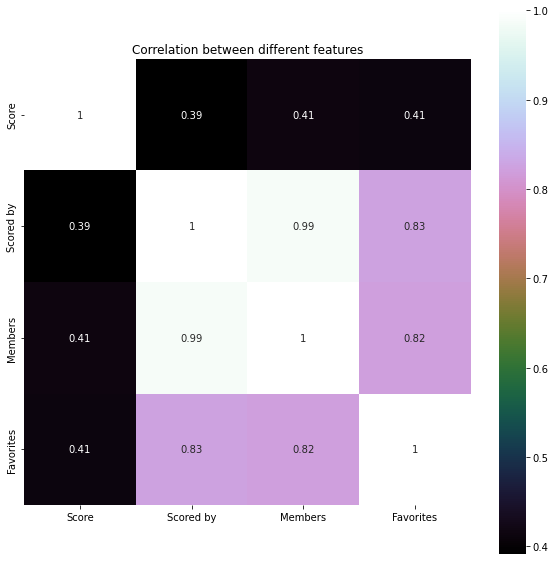

In [ ]:
correlation = num_df_anime.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

# Data Preprocessing

## Handling Missing Value

In [ ]:
df.isna().sum()

Title              0
Type               0
Episodes           0
Status             0
Start airing       0
End airing         0
Starting season    0
Broadcast time     0
Producers          0
Licensors          0
Studios            0
Sources            0
Genres             0
Duration           0
Rating             0
Score              0
Scored by          0
Members            0
Favorites          0
Description        0
dtype: int64

Tidak terdapat missing value, tapi dominan beberapa kolom memiliki nilai -. Hal ini harus dihandle dengan cara penghapusan kolom

In [ ]:
df = df.drop(['End airing', 'Start airing', 'Starting season', 'Broadcast time', 'Producers', 'Licensors', 'Description', 'Duration'], axis = 1)
df.head()

,Title,Type,Episodes,Status,Studios,Sources,Genres,Rating,Score,Scored by,Members,Favorites
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",R,9.25,719706,1176368,105387
1,Kimi no Na wa.,Movie,1,Finished Airing,CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",PG-13,9.19,454969,705186,33936
2,Gintama°,TV,51,Finished Airing,Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",R,9.16,70279,194359,5597
3,Steins;Gate 0,TV,23,Currently Airing,White Fox,Visual novel,"Sci-Fi,Thriller",PG-13,9.16,12609,186331,1117
4,Steins;Gate,TV,24,Finished Airing,White Fox,Visual novel,"Sci-Fi,Thriller",PG-13,9.14,552791,990419,90365


## Handling Duplicated Data

In [ ]:
df.duplicated().sum()

0

## Handling Outlier Data

In [ ]:
# using zscore
import numpy as np
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in nums:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df_filtered = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_filtered)}')

Jumlah baris sebelum memfilter outlier: 1563
Jumlah baris setelah memfilter outlier: 1505


## Normalization Genre

In [ ]:
df_filtered['Genres'] = df_filtered['Genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df_filtered['Genres'] = df_filtered['Genres'].str.split(',')

In [ ]:
df_filtered['Genres']

18           [Sci-Fi, Adventure, Mystery, Drama, Fantasy]
20               [Comedy, Sports, Drama, School, Shounen]
21               [Action, Mystery, Supernatural, Vampire]
23      [Action, Sci-Fi, Comedy, Historical, Parody, S...
24                             [Historical, Drama, Josei]
                              ...                        
1558    [Action, Comedy, Demons, Supernatural, Fantasy...
1559                                [Comedy, SliceofLife]
1560    [Action, Comedy, MartialArts, Shounen, SuperPo...
1561    [Adventure, Mystery, SuperPower, Supernatural,...
1562                 [Mystery, Comedy, SuperPower, Drama]
Name: Genres, Length: 1505, dtype: object

### EDA New Genre

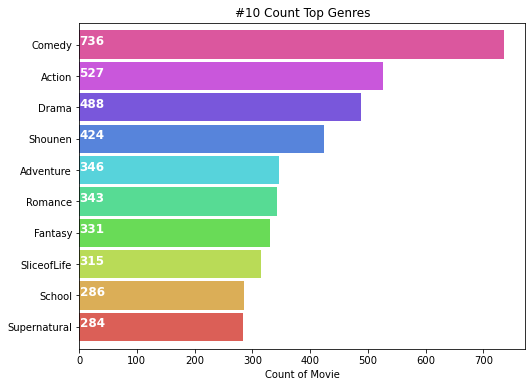

In [ ]:
plt.subplots(figsize=(8,6))
list1 = []
for i in df_filtered['Genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('#10 Count Top Genres')
plt.xlabel('Count of Movie')
plt.show()

### EDA - Unique Genre
Tujuannya untuk encoding categorical values yang ada di dalam kolom genre

In [ ]:
for i,j in zip(df_filtered['Genres'],df_filtered.index):
    list2=[]
    list2=i
    list2.sort()
    df_filtered.loc[j,'Genres']=str(list2)
df_filtered['Genres'] = df_filtered['Genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df_filtered['Genres'] = df_filtered['Genres'].str.split(',')

In [ ]:
genreList = []
for index, row in df_filtered.iterrows():
    genres = row["Genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #now we have a list with unique genres

['Adventure',
 'Drama',
 'Fantasy',
 'Mystery',
 'Sci-Fi',
 'Comedy',
 'School',
 'Shounen',
 'Sports',
 'Action']

## Encoding Genre

In [ ]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [ ]:
df_filtered['Genres_bin'] = df_filtered['Genres'].apply(lambda x: binary(x))
df_filtered['Genres_bin'].head()

18    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
20    [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...
21    [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...
23    [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, ...
24    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
Name: Genres_bin, dtype: object

In [ ]:
df_filtered.tail()

,Title,Type,Episodes,Status,Studios,Sources,Genres,Rating,Score,Scored by,Members,Favorites,Genres_bin
1558,Kuroshitsuji II,TV,12,Finished Airing,A-1 Pictures,Manga,"[Action, Comedy, Demons, Fantasy, Shounen, Sup...",R,7.48,171506,296985,3576,"[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, ..."
1559,Minami-ke Natsuyasumi,OVA,1,Finished Airing,feel.,Manga,"[Comedy, SliceofLife]",PG-13,7.48,6062,12111,4,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1560,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,Movie,1,Finished Airing,Studio Pierrot,Manga,"[Action, Comedy, MartialArts, Shounen, SuperPo...",PG-13,7.48,61505,104288,129,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ..."
1561,Persona 4 the Animation: The Factor of Hope,Movie,1,Finished Airing,AIC A.S.T.A.,-,"[Adventure, Mystery, School, SuperPower, Super...",PG-13,7.48,3054,12868,12,"[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1562,Re:␣Hamatora,TV,12,Finished Airing,Lerche,Original,"[Comedy, Drama, Mystery, SuperPower]",R,7.48,46334,99299,330,"[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Normalization Type

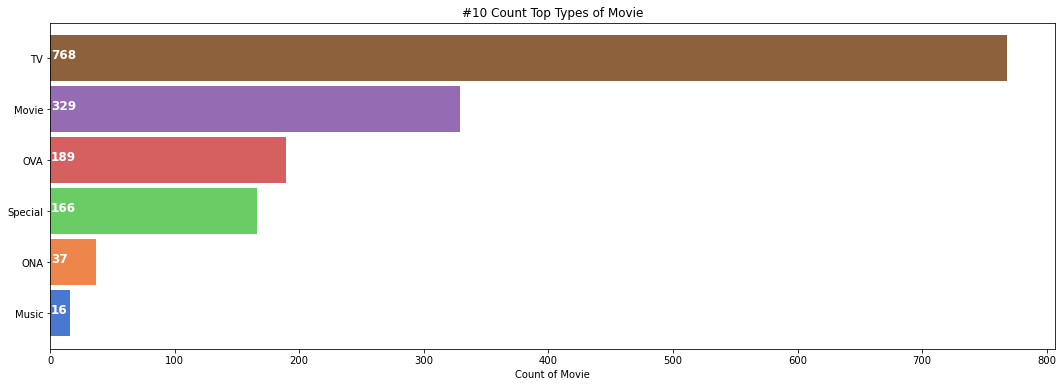

In [ ]:
plt.subplots(figsize=(18,6))
ax = df_filtered[df_filtered['Type']!=''].Type.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(df_filtered[df_filtered['Type']!=''].Type.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('#10 Count Top Types of Movie')
plt.xlabel('Count of Movie')
plt.show()

### Encoding Type

In [ ]:
typeList=[]
for i in cat_df_anime['Type']:
    if i not in typeList:
        typeList.append(i)
        
typeList

['TV', 'Movie', 'OVA', 'Special', 'Music', 'ONA']

In [ ]:
def binary(type_list):
    binaryList = []  
    for types in typeList:
        if types in type_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [ ]:
df_filtered['Type_bin'] = df_filtered['Type'].apply(lambda x: binary(x))
df_filtered.head()

,Title,Type,Episodes,Status,Studios,Sources,Genres,Rating,Score,Scored by,Members,Favorites,Genres_bin,Type_bin
18,Made in Abyss,TV,13,Finished Airing,Kinema Citrus,Web manga,"[Adventure, Drama, Fantasy, Mystery, Sci-Fi]",R,8.92,157920,308918,11246,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0]"
20,Haikyuu!! Second Season,TV,25,Finished Airing,Production I.G,Manga,"[Comedy, Drama, School, Shounen, Sports]",PG-13,8.88,201157,326190,6480,"[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0]"
21,Kizumonogatari III: Reiketsu-hen,Movie,1,Finished Airing,Shaft,Light novel,"[Action, Mystery, Supernatural, Vampire]",R,8.88,59924,125489,1477,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0]"
23,Gintama.: Shirogane no Tamashii-hen,TV,12,Finished Airing,Bandai Namco Pictures,Manga,"[Action, Comedy, Historical, Parody, Samurai, ...",PG-13,8.86,13190,39829,388,"[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0]"
24,Shouwa Genroku Rakugo Shinjuu: Sukeroku Futata...,TV,12,Finished Airing,Studio Deen,Manga,"[Drama, Historical, Josei]",PG-13,8.87,26744,73103,1360,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[1, 0, 0, 0, 0, 0]"


## Normalization Rating

In [ ]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
df_filtered['Rating'] = df_filtered['Rating'].apply(xstr)

### EDA - Rating

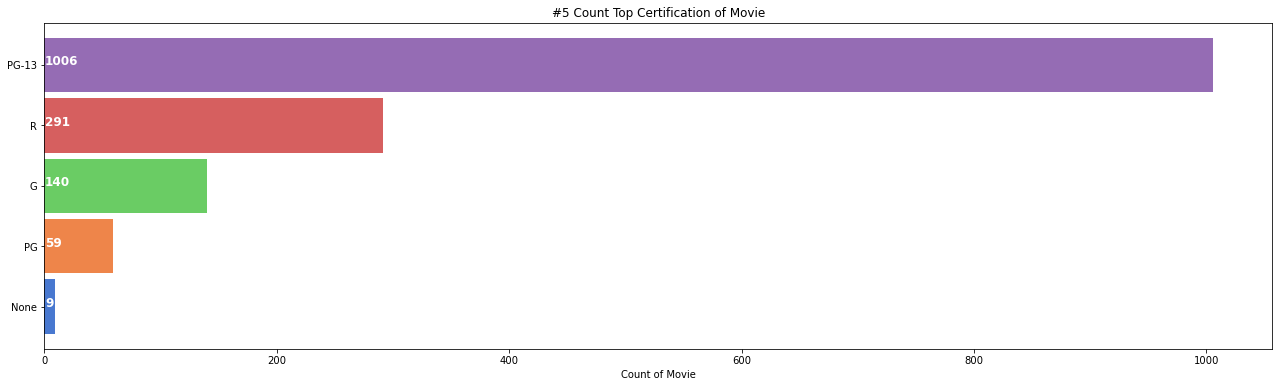

In [ ]:
plt.subplots(figsize=(22,6))
ax = df_filtered[df_filtered['Rating']!=''].Rating.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(df_filtered[df_filtered['Rating']!=''].Rating.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('#5 Count Top Certification of Movie')
plt.xlabel('Count of Movie')
plt.show()

In [ ]:
ratingList=[]
for i in df_filtered['Rating']:
    if i not in ratingList:
        ratingList.append(i)
        
ratingList

['R', 'PG-13', 'PG', 'G', 'None']

In [ ]:
def binary(rating_list):
    binaryList = []  
    for rating in ratingList:
        if rating in rating_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [ ]:
df_filtered['Rating_bin'] = df_filtered['Rating'].apply(lambda x: binary(x))
df_filtered.head()

,Title,Type,Episodes,Status,Studios,Sources,Genres,Rating,Score,Scored by,Members,Favorites,Genres_bin,Type_bin,Rating_bin
18,Made in Abyss,TV,13,Finished Airing,Kinema Citrus,Web manga,"[Adventure, Drama, Fantasy, Mystery, Sci-Fi]",R,8.92,157920,308918,11246,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0]"
20,Haikyuu!! Second Season,TV,25,Finished Airing,Production I.G,Manga,"[Comedy, Drama, School, Shounen, Sports]",PG-13,8.88,201157,326190,6480,"[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 0]"
21,Kizumonogatari III: Reiketsu-hen,Movie,1,Finished Airing,Shaft,Light novel,"[Action, Mystery, Supernatural, Vampire]",R,8.88,59924,125489,1477,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0]","[1, 0, 0, 0, 0]"
23,Gintama.: Shirogane no Tamashii-hen,TV,12,Finished Airing,Bandai Namco Pictures,Manga,"[Action, Comedy, Historical, Parody, Samurai, ...",PG-13,8.86,13190,39829,388,"[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 0]"
24,Shouwa Genroku Rakugo Shinjuu: Sukeroku Futata...,TV,12,Finished Airing,Studio Deen,Manga,"[Drama, Historical, Josei]",PG-13,8.87,26744,73103,1360,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[1, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 0]"


## Feature Selection

In [ ]:
df_filtered.insert(0, 'id', range(0, len(df_filtered)))

In [ ]:
kopian = df_filtered[['Title','Genres','Type', 'Rating', 'Score', 'Genres_bin','Type_bin','id', 'Rating_bin']]
kopian.iloc[:, -4:].head()

,Genres_bin,Type_bin,id,Rating_bin
18,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0]",0,"[1, 0, 0, 0, 0]"
20,"[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0]",1,"[0, 1, 1, 1, 0]"
21,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0]",2,"[1, 0, 0, 0, 0]"
23,"[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0]",3,"[0, 1, 1, 1, 0]"
24,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[1, 0, 0, 0, 0, 0]",4,"[0, 1, 1, 1, 0]"


## Distance Each Data Point

In [ ]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = kopian.iloc[movieId1]
    b = kopian.iloc[movieId2]
    
    genresA = a['Genres_bin']
    genresB = b['Genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    typeA = a['Type_bin']
    typeB = b['Type_bin']
    typeDistance = spatial.distance.cosine(typeA, typeB)
    
    ratingA = a['Rating_bin']
    ratingB = b['Rating_bin']
    ratingDistance = spatial.distance.cosine(ratingA, ratingB)
    
    
    
    return genreDistance + typeDistance + ratingDistance

In [ ]:
Similarity(3, 155)

1.7817821097640076

In [ ]:
print(kopian.iloc[3])
print('\n\n')
print(kopian.iloc[155])

Title                       Gintama.: Shirogane no Tamashii-hen
Genres        [Action, Comedy, Historical, Parody, Samurai, ...
Type                                                         TV
Rating                                                    PG-13
Score                                                      8.86
Genres_bin    [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, ...
Type_bin                                     [1, 0, 0, 0, 0, 0]
id                                                            3
Rating_bin                                      [0, 1, 1, 1, 0]
Name: 23, dtype: object



Title                                            Major: Message
Genres                                  [Comedy, Drama, Sports]
Type                                                        OVA
Rating                                                    PG-13
Score                                                      8.33
Genres_bin    [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
Type_bin     

In [ ]:
Similarity(27, 53)

0

In [ ]:
print(kopian.iloc[27])
print('\n\n')
print(kopian.iloc[53])

Title                                                 Haikyuu!!
Genres                 [Comedy, Drama, School, Shounen, Sports]
Type                                                         TV
Rating                                                    PG-13
Score                                                      8.66
Genres_bin    [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...
Type_bin                                     [1, 0, 0, 0, 0, 0]
id                                                           27
Rating_bin                                      [0, 1, 1, 1, 0]
Name: 52, dtype: object



Title                                                 Slam Dunk
Genres                 [Comedy, Drama, School, Shounen, Sports]
Type                                                         TV
Rating                                                    PG-13
Score                                                      8.55
Genres_bin    [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...
Type_bin     

# K-Nearest Neighbors Algorithm
1. Awal mulanya mencari nilai cosine similarity dari data poin terdekat dari film yang diinputkan, dengan menggunakan function similarity. 
2. Selanjutnya melakukan pengurutan agar jarak yang diambil merupakan jarak yang terdekat dengan data pointnya. 
3. Setelahnya dikeluarkan anime rekomendasi sebanyak nilai K yang sudah ditentukan.

In [ ]:
import operator

def predict_score(name):   
    new_anime = kopian[kopian['Title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_anime.Title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in kopian.iterrows():
            if movie['id'] != baseMovie['id'].values[0]:
                dist = Similarity(baseMovie['id'].values[0], movie['id'])
                distances.append((movie['id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 5
    avgRating = 0
    neighbors = getNeighbors(new_anime, K)
    
    print('\nRecommended Anime: \n')
    for neighbor in neighbors:
        avgRating = avgRating+kopian.iloc[neighbor[0]][4]
        print( str(kopian.iloc[neighbor[0]][7]) + ") " + kopian.iloc[neighbor[0]][0]+" | Genres: "+str(kopian.iloc[neighbor[0]][1]).strip('[]').replace(' ','') + " " + " | Film Classification: "+ str(kopian.iloc[neighbor[0]][3]) + " " + "| Rating: " + str(kopian.iloc[neighbor[0]][4]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_anime['Title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_anime['Title'].values[0],new_anime['Score']))

In [ ]:
name = input('Enter a movie title: ')
predict_score(name)

Enter a movie title: hai
Selected Movie:  Touhai Densetsu Akagi: Yami ni Maiorita Tensai

Recommended Anime: 

161) Gyakkyou Burai Kaiji: Ultimate Survivor | Genres: 'Game','Psychological','Seinen','Thriller'  | Film Classification: R | Rating: 8.32
190) Gyakkyou Burai Kaiji: Hakairoku-hen | Genres: 'Game','Psychological','Seinen','Thriller'  | Film Classification: R | Rating: 8.28
680) Aoi Bungaku Series | Genres: 'Drama','Historical','Psychological','Seinen','Thriller'  | Film Classification: R | Rating: 7.85
241) Zankyou no Terror | Genres: 'Mystery','Psychological','Thriller'  | Film Classification: R | Rating: 8.21
42) Rainbow: Nisha Rokubou no Shichinin | Genres: 'Drama','Historical','Seinen','Thriller'  | Film Classification: R | Rating: 8.59


The predicted rating for Touhai Densetsu Akagi: Yami ni Maiorita Tensai is: 8.250000
The actual rating for Touhai Densetsu Akagi: Yami ni Maiorita Tensai is 7.990000


# Manual Evaluation

In [ ]:
Similarity(1, 309)

3.0

In [ ]:
Similarity(1, 310)

0.7418011102528388